In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('ds_salaries.csv')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [3]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [5]:
df.job_title.nunique()

93

In [6]:
df.company_location.nunique()

72

In [7]:
df.groupby('job_title')['work_year'].value_counts()

job_title                      work_year
3D Computer Vision Researcher  2021          2
                               2022          2
AI Developer                   2023          8
                               2022          3
AI Programmer                  2022          1
                                            ..
Research Scientist             2021         10
                               2020          2
Software Data Engineer         2023          2
Staff Data Analyst             2020          1
Staff Data Scientist           2021          1
Name: work_year, Length: 200, dtype: int64

In [8]:
df.groupby('job_title')['salary_in_usd'].sum().sort_values(ascending=False)

job_title
Data Engineer                148497164
Data Scientist               118330603
Data Analyst                  66534331
Machine Learning Engineer     44705620
Data Architect                16333091
                               ...    
Principal Data Architect         38154
Compliance Data Analyst          30000
Staff Data Analyst               15000
Product Data Scientist            8000
Power BI Developer                5409
Name: salary_in_usd, Length: 93, dtype: int64

In [9]:
top_5_salaries = df.groupby('job_title')['salary_in_usd'].sum().sort_values(ascending=False).head(5)
top_5_salaries

job_title
Data Engineer                148497164
Data Scientist               118330603
Data Analyst                  66534331
Machine Learning Engineer     44705620
Data Architect                16333091
Name: salary_in_usd, dtype: int64

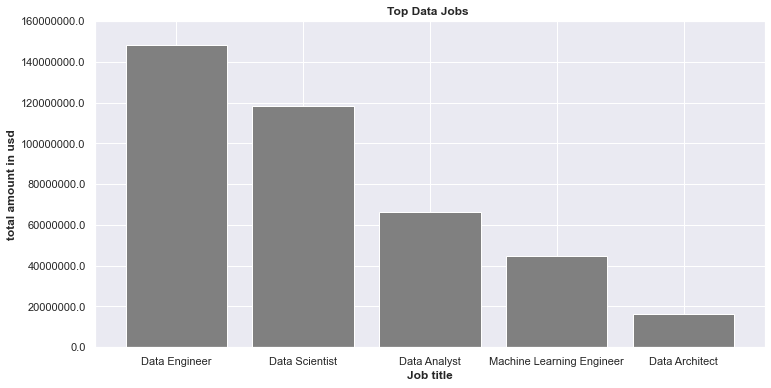

In [10]:
#plotting top_5 total salaries per job_title
plt.figure(figsize=(12,6))
plt.bar(x= top_5_salaries.index,
        height= top_5_salaries.values,
        color = 'Grey')
plt.yticks(ticks=plt.yticks()[0],labels=plt.yticks()[0] )
plt.xlabel('Job title', weight= 'bold')
plt.ylabel('total amount in usd', weight= 'bold')
plt.title('Top Data Jobs ', fontsize = 12, weight ='bold')
plt.show()

In [11]:
#checking total amount paid to data engineers across different locations
DE = df[df.job_title == 'Data Engineer']
DE_location = DE.groupby('company_location')['salary_in_usd'].sum().sort_values(ascending= False)
DE_location


company_location
US    138587808
GB      4534515
ES      1236672
CA      1185200
GR       473417
DE       379559
PR       335000
PT       322694
LT       189624
NL       175020
MX       165511
FR       135280
IN       131683
SI       123405
BR       120000
IE       101943
AU        75050
AT        74130
JP        41689
TR        40119
PL        28476
MT        28369
VN        12000
Name: salary_in_usd, dtype: int64

In [12]:
df.groupby('company_size')['salary_in_usd'].sum().sort_values(ascending= False)

company_size
M    451290619
L     53708646
S     11577549
Name: salary_in_usd, dtype: int64

<AxesSubplot:xlabel='company_size', ylabel='salary_in_usd'>

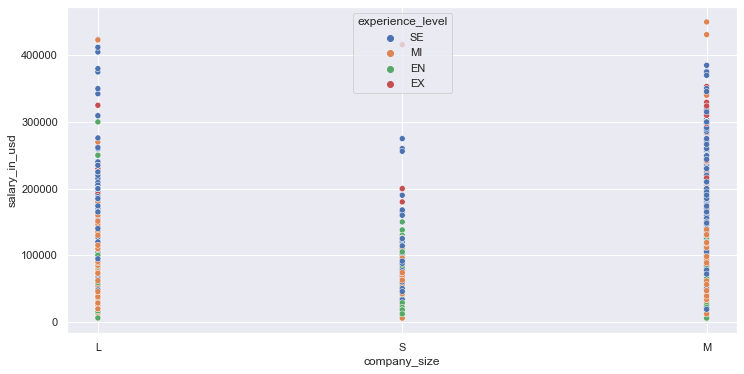

In [13]:
plt.figure(figsize= (12,6))
sns.scatterplot(x= 'company_size', y= 'salary_in_usd', data= df, hue= 'experience_level')

- Does company size affect Job role diversity ?

In [14]:
size_diversity = df.groupby('company_size')['job_title'].value_counts()
size_diversity

company_size  job_title                         
L             Data Scientist                        99
              Data Engineer                         79
              Data Analyst                          38
              Machine Learning Engineer             37
              Applied Scientist                     30
                                                    ..
S             Machine Learning Software Engineer     1
              Marketing Data Analyst                 1
              Principal Data Analyst                 1
              Principal Data Scientist               1
              Product Data Analyst                   1
Name: job_title, Length: 179, dtype: int64

In [15]:
size_diversity.loc['L']

job_title
Data Scientist                         99
Data Engineer                          79
Data Analyst                           38
Machine Learning Engineer              37
Applied Scientist                      30
                                       ..
Principal Data Architect                1
Principal Data Engineer                 1
Principal Machine Learning Engineer     1
Product Data Scientist                  1
Software Data Engineer                  1
Name: job_title, Length: 67, dtype: int64

In [16]:
size_diversity.loc['M']

job_title
Data Engineer                953
Data Scientist               713
Data Analyst                 556
Machine Learning Engineer    234
Analytics Engineer           101
                            ... 
Principal Data Analyst         1
Principal Data Engineer        1
Software Data Engineer         1
Staff Data Analyst             1
Staff Data Scientist           1
Name: job_title, Length: 72, dtype: int64

In [17]:
size_diversity.loc['S']

job_title
Data Scientist                        28
Data Analyst                          18
Machine Learning Engineer             18
Data Engineer                          8
Machine Learning Scientist             7
ML Engineer                            6
AI Scientist                           5
Computer Vision Engineer               4
Lead Data Engineer                     4
Research Scientist                     4
AI Developer                           3
BI Data Analyst                        3
Big Data Engineer                      3
Data Science Consultant                3
Lead Data Scientist                    3
3D Computer Vision Researcher          2
Cloud Data Engineer                    2
Computer Vision Software Engineer      2
Machine Learning Developer             2
NLP Engineer                           2
Research Engineer                      2
Analytics Engineer                     1
Applied Data Scientist                 1
Applied Machine Learning Engineer      1
Applie

In [19]:

df.work_year.unique()

array([2023, 2022, 2020, 2021], dtype=int64)

In [20]:
yr_comp = df.groupby('work_year')['job_title'].count()
yr_comp

work_year
2020      76
2021     230
2022    1664
2023    1785
Name: job_title, dtype: int64

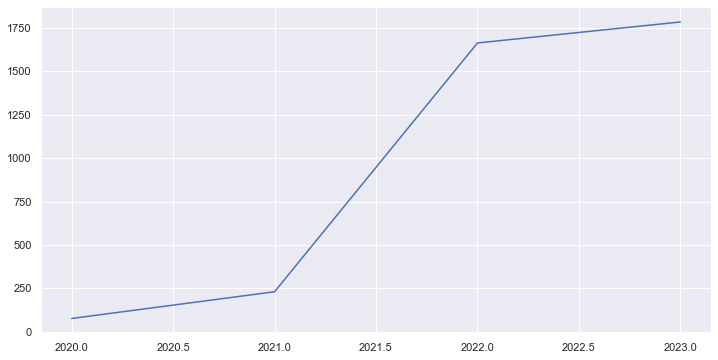

In [21]:
plt.figure(figsize = (12,6))
plt.plot(yr_comp.index,
         yr_comp.values)
plt.show()

In [22]:
yr_sal_comp = df.groupby('work_year')['salary_in_usd'].sum()
yr_sal_comp

work_year
2020      7015000
2021     21640058
2022    221875465
2023    266046291
Name: salary_in_usd, dtype: int64

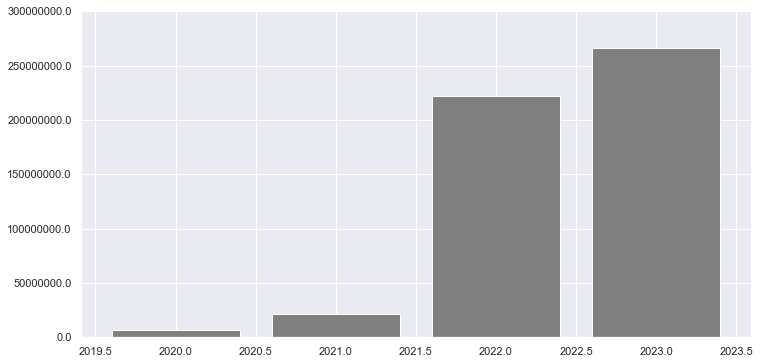

In [23]:
plt.figure(figsize = (12,6))
plt.bar(x = yr_sal_comp.index,
        height = yr_sal_comp.values,
        color = 'Grey')
plt.yticks(ticks = plt.yticks()[0],
           labels = plt.yticks()[0])
plt.show()

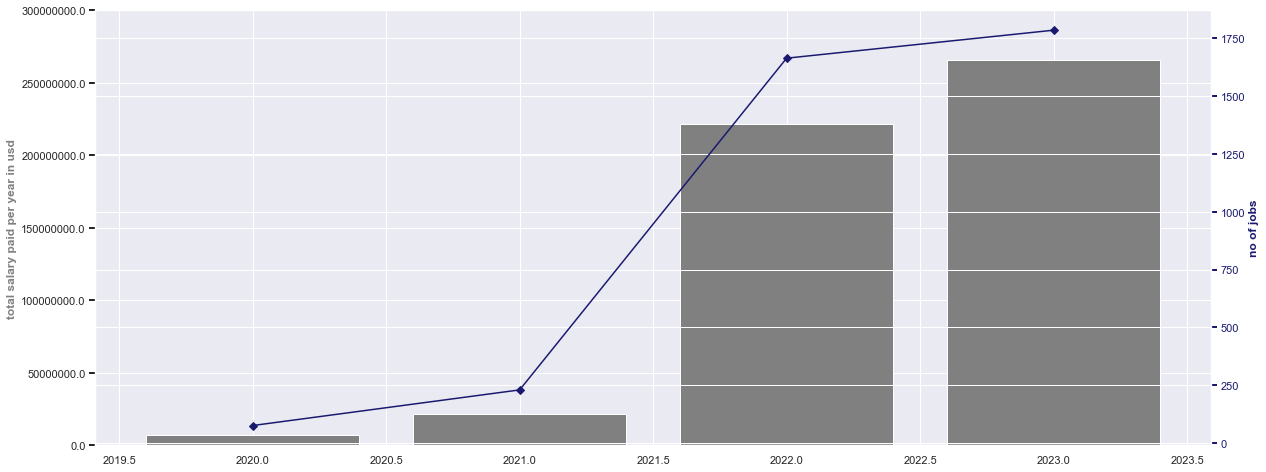

In [24]:
#remember to remove gridlines

fig, ax = plt.subplots(figsize = (20,8))

ax.bar(yr_sal_comp.index,
       yr_sal_comp.values,
       color = 'Grey')
ax.set_yticks(ticks = plt.yticks()[0],
           labels = plt.yticks()[0])
ax.set_ylabel('total salary paid per year in usd', 
              weight = 'bold',
              color = 'Grey')
ax.tick_params(axis = 'y',
               width = 2)
ax1 = ax.twinx()
ax1.plot(yr_comp.index,
         yr_comp.values,
         color = 'Midnightblue',
         marker = 'D')
ax1.set_ylabel('no of jobs', 
               weight = 'bold',
               color = 'Midnightblue')
ax1.tick_params(axis = 'y',
                width = 2,
                colors = 'Midnightblue')

In [44]:
y = df.groupby('company_location')['salary_in_usd'].sum().sort_values(ascending = False)
y.head(10)

company_location
US    461538909
GB     14945089
CA     11476839
DE      4944173
ES      4441057
FR      2248717
IN      1751469
AU      1120468
NL      1023598
MX       971511
Name: salary_in_usd, dtype: int64

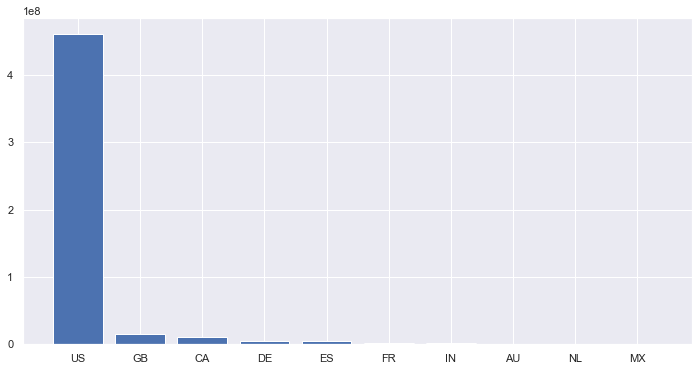

In [46]:
plt.figure(figsize = (12,6))
plt.bar(x = y.head(10).index,
        height = y.head(10).values)
plt.show()

In [50]:
exp_lvl = df.experience_level.value_counts()
exp_lvl

SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64

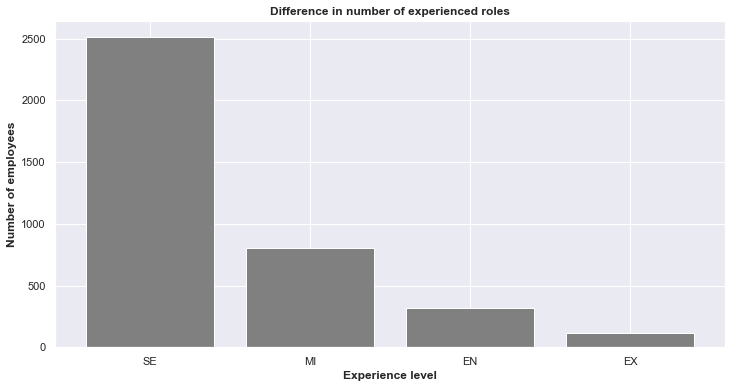

In [53]:
plt.figure(figsize = (12,6))
plt.bar(x = exp_lvl.index,
        height = exp_lvl.values,
        color = 'Grey')
plt.xlabel('Experience level', weight = 'bold')
plt.ylabel('Number of employees', weight =  'bold')
plt.title('Difference in number of experienced roles', fontsize = 12, weight = 'bold')
plt.show()

In [78]:
comp_size = df.company_size
comp_size

0       L
1       S
2       S
3       M
4       M
       ..
3750    L
3751    L
3752    S
3753    L
3754    L
Name: company_size, Length: 3755, dtype: object

<AxesSubplot:>

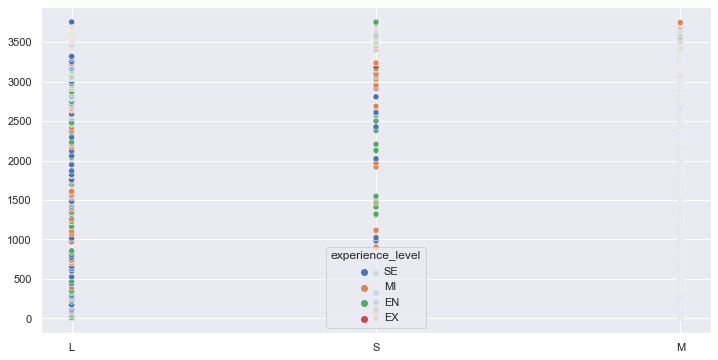

In [82]:
plt.figure(figsize=(12,6))
sns.scatterplot(x= comp_size.values,
                y = comp_size.index,
                hue = df.experience_level)

In [47]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [66]:
EN2 = df[df.experience_level == 'EN'].groupby('company_size').count()
EN2

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location
company_size,,,,,,,,,,
L,100,100,100,100,100,100,100,100,100,100
M,171,171,171,171,171,171,171,171,171,171
S,49,49,49,49,49,49,49,49,49,49


In [69]:
df.groupby('company_size')['experience_level'].value_counts()

company_size  experience_level
L             SE                   207
              MI                   134
              EN                   100
              EX                    13
M             SE                  2266
              MI                   621
              EN                   171
              EX                    95
S             MI                    50
              EN                    49
              SE                    43
              EX                     6
Name: experience_level, dtype: int64